<div style="font-family:Trebuchet MS; background-color:#dbe3ed; border-left:5px solid #000000; padding:12px; text-align:center;">
    <h2 style="color:#004080; font-size:48px;"><b>Melbourne Housing Market</b></h2>
    <hr style="border-top:2px solid #004080;">
    <h3 style="font-size:14px; color:#004080; text-align:left;"><strong>David Fernández Reboredo</strong></h3>
    <img src="https://th.bing.com/th/id/OIG1.tB1IaR9ONaRtPNYtOrYt?w=1024&h=1024&rs=1&pid=ImgDetMain" alt="Melbourne Housing Market" style="max-width:50%; display:block; margin:auto;">
</div>



<div style="font-family:Trebuchet MS; background-color: #dbe3ed; padding: 10px; border-radius: 5px;">
    <h2 style='color:#004080;'>Índice</h2>
    <hr style="border-top:2px solid #004080;">
</div>


1. [FITS](#FITS)
2. [DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR](#DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR)
3. [MATRIZ_DE_CORRELACION](#MATRIZ_DE_CORRELACION)
    - [HISTOGRAMAS_DE_LAS_COLUMNAS](###Histogramas_de_las_columnas_del_DataFrame)
4. [ENTRENAMIENTO](#ENTRENAMIENTO)


## FITS

En esta seccion podemos encontrar los métodos para ejecutar el entrenamiento:

    -train
    - regresion_lineal
    - arbol_de_regresion_test
    - arbol_decision
    - random_forest
    - regresion_svr
    - xgboost

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split

def train(pd):
    wine = pd.copy()											
    y = wine["Price"].copy()
    x = wine[["Rooms","Distance", "Bathroom","Bedroom2",'YearBuilt','Lattitude','Longtitude','CouncilArea_Int','Regionname_Int','Car','BuildingArea']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test


def regresion_lineal(pd):
    print('------------Regresion Lineal-------------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    lin_reg= LinearRegression()

    lin_reg.fit(x_train,y_train)

    predicciones = lin_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)

    score = r2_score(y_train, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_de_regresion_test(pd):
    print('----------Arbol de regresión-----------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)

    predicciones = tree_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)
    score = r2_score(y_train, predicciones)
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_decision(pd):
    # cross-validation arbol decision
    print('---------------Arbol de decision---------------')
    x_train,y_train,x_test,y_test=train(pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    lin_score = cross_val_score(tree_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-lin_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = tree_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def random_forest(pd):
    print('---------------Random forest---------------')
    x_train,y_train,x_test,y_test=train(pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    rf_reg = RandomForestRegressor(n_estimators=100)
    rf_reg.fit(x_train, y_train)

    rf_score = cross_val_score(rf_reg, x_test, y_test,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = rf_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def regresion_svr(pd):
    print('---------------Regresion svr---------------')
    x_train,y_train,x_test,y_test=train(pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    sv_reg = SVR()

    sv_reg.fit(x_train, y_train)
    predicciones = sv_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(sv_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("SV cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def xgboost(pd):
    print('---------------Xboost---------------')
    x_train,y_train,x_test,y_test=train(pd)
    # scaler = StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(x_train, y_train)
    predicciones = xgb_reg.predict(x_test)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(xgb_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("XGB cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

# DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR

Recoge las definiciones para hacer mapas de calor, boxplots y mapas de calor:

In [3]:
import matplotlib.pyplot as plt
def boxplot_general(pd,cadena):
    for tipo in pd.columns:
        if tipo !=cadena:
            data_to_plot = [pd[pd[cadena] == i][tipo].values for i in sorted(pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()
def boxplot(pd,y,x):
        data_to_plot = [pd[pd[x] == i][y].values for i in sorted(pd[x].unique())]
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, labels=sorted(pd[x].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        plt.xlabel(x)
        plt.ylabel(f'{y}')
        plt.title(f'Boxplot Quality/ {y}')
        plt.show()
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(15, 8))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Greens" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

# IMPORTACION_DE_CSV

Aquí comienza la importación del `Melbourne_housing_FULL.csv` a partir de aquí vamos a observar la informacion relativa al Dataframe

In [4]:
import pandas as pd 
import numpy as np 
mel_full = pd.read_csv('Melbourne_housing_FULL.csv')

In [5]:
mel_full

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0



Proporciona información detallada sobre el DataFrame `mel_full`, incluyendo el número de filas, el nombre y tipo de cada columna, y el número de valores no nulos en cada columna. Esto puede ayudarte a comprender mejor la estructura y la calidad de los datos cargados desde el archivo CSV


In [6]:
mel_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Observamos que hai tipos object, primeramente vamos a pasarlos a string y el Date pasarlo a formato datetime

In [7]:
columnas = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for col in columnas:
    mel_full[col] = mel_full[col].astype('string') 

mel_full['Date']=pd.to_datetime(mel_full['Date'], format="%d/%m/%Y")
mel_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  string        
 1   Address        34857 non-null  string        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  string        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  string        
 6   SellerG        34857 non-null  string        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

Si realizamos un len podemos ver todo el conjunto de datos que posee el Dataframe

In [8]:
len(mel_full)

34857

Utiliza el método `describe()` del DataFrame `mel_full` para obtener estadísticas descriptivas sobre las columnas numéricas del DataFrame.

In [9]:
mel_full.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34857,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,2017-05-23 11:01:38.838109696,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,2016-11-19 00:00:00,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,2017-10-28 00:00:00,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,2018-03-17 00:00:00,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000
std,0.969933,6.414671e+05,NaN,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313


### Histogramas_de_las_columnas_del_DataFrame

Se utiliza el método `hist()` del DataFrame `mel_full` para generar histogramas de las columnas del DataFrame.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

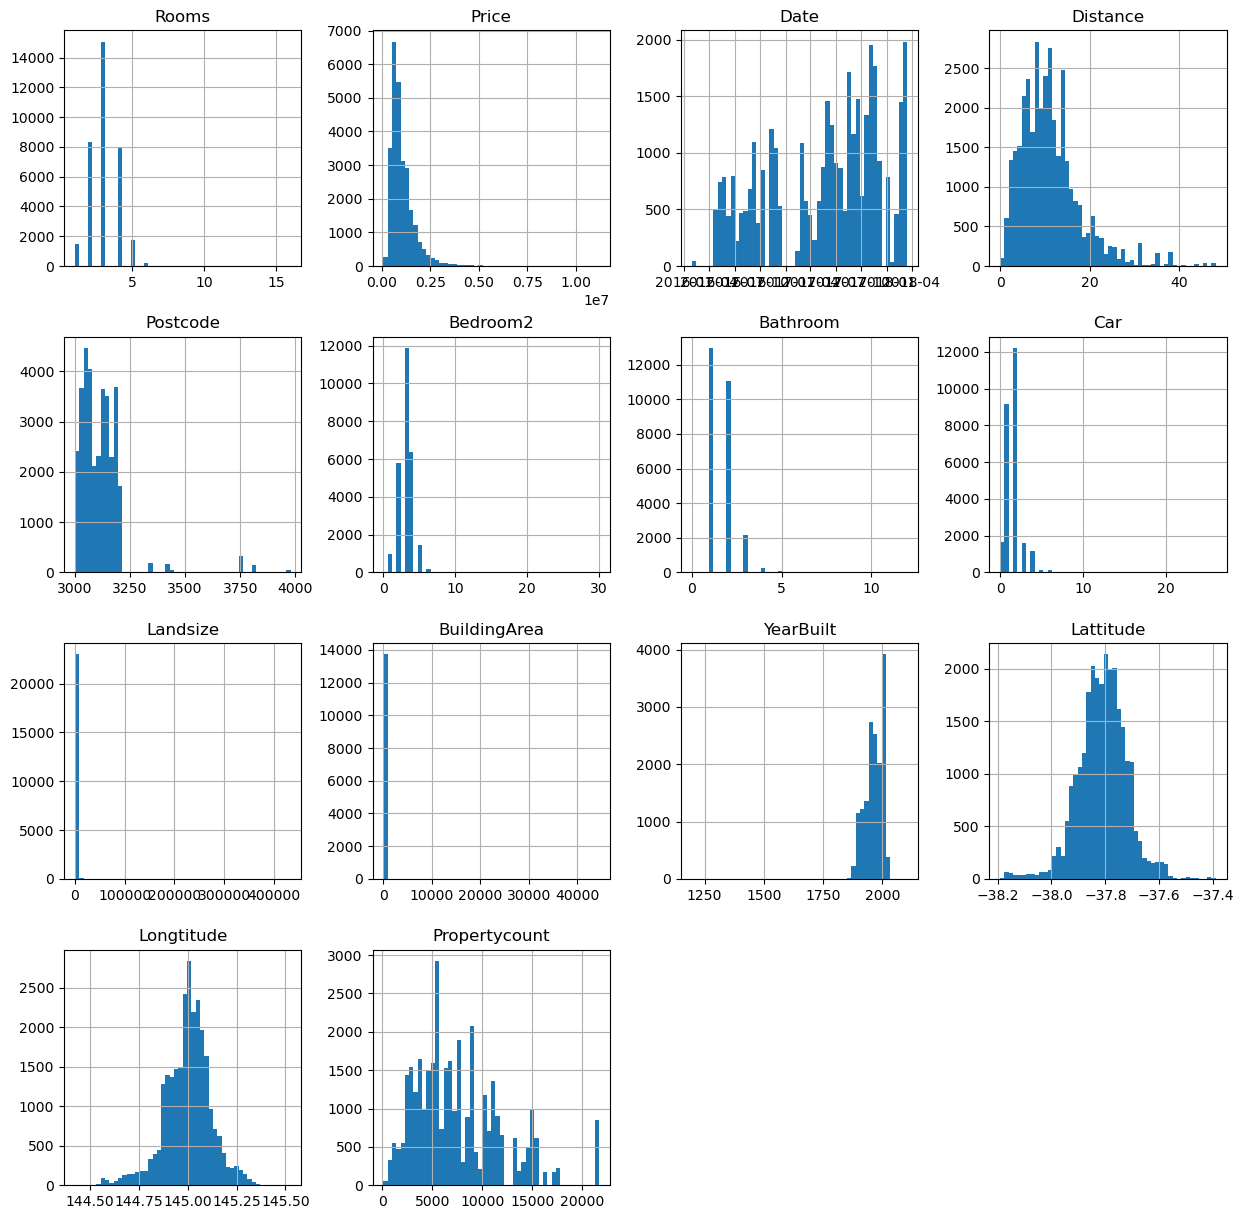

In [10]:
mel_full.hist(bins=50, figsize=(15,15))

In [11]:
mel_full.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [12]:

mel_full.drop_duplicates(inplace=True)
mel_sin_string=mel_full.copy()
mel_sin_string=mel_sin_string.drop(['Suburb','Address','SellerG'],axis=1)


In [13]:
mel_sin_string[['Method']].value_counts()

Method
S         19744
SP         5094
PI         4850
VB         3108
SN         1317
PN          308
SA          226
W           173
SS           36
Name: count, dtype: int64

Ahora vamos pasar a numerico los distintos strings

In [14]:
mel_sin_string[['Type']].value_counts()

Type
h       23980
u        7297
t        3579
Name: count, dtype: int64

In [15]:
mel_sin_string['CouncilArea'].value_counts()

CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1045
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(mel_sin_string[['Method']])
mel_sin_string['Method_Int'] = housing_cat_encoded
mel_sin_string[['Method_Int']].value_counts()


Method_Int
2.0           19744
5.0            5094
0.0            4850
7.0            3108
4.0            1317
1.0             308
3.0             226
8.0             173
6.0              36
Name: count, dtype: int64

In [17]:
oe= OrdinalEncoder()
mel_sin_string['CouncilArea'].replace(['NAType', 'str'], None)
mel_sin_string['CouncilArea'] = mel_sin_string['CouncilArea'].astype(str)
housing_cat_encoded = oe.fit_transform(mel_sin_string[['CouncilArea']])
mel_sin_string['CouncilArea_Int'] = housing_cat_encoded
mel_sin_string[['CouncilArea_Int']].value_counts()

CouncilArea_Int
3.0                3675
7.0                2851
25.0               2122
9.0                2006
19.0               1952
1.0                1861
23.0               1791
2.0                1764
4.0                1593
22.0               1466
28.0               1460
17.0               1451
27.0               1280
12.0               1214
32.0               1186
16.0               1045
11.0                942
13.0                871
30.0                828
31.0                624
29.0                618
18.0                506
14.0                371
10.0                314
20.0                292
8.0                 290
6.0                 176
33.0                102
26.0                 88
15.0                 46
5.0                  41
21.0                 20
24.0                  7
0.0                   3
Name: count, dtype: int64

In [18]:
oe= OrdinalEncoder()
mel_sin_string['Regionname'].replace(['NAType', 'str'], None)
mel_sin_string['Regionname'] = mel_sin_string['Regionname'].astype(str)
housing_cat_encoded = oe.fit_transform(mel_sin_string[['Regionname']])
mel_sin_string['Regionname_Int'] = housing_cat_encoded
mel_sin_string[['Regionname_Int']].value_counts()

Regionname_Int
6.0               11836
3.0                9557
7.0                6799
1.0                4376
5.0                1739
2.0                 228
4.0                 203
8.0                 115
0.0                   3
Name: count, dtype: int64

Borraremos las columnas que sean String y que han sido pasadas a Int mediante OrdinalEncoder()

In [19]:
mel_sin_string=mel_sin_string[mel_sin_string['Type']=='h']
dfmelboune=mel_sin_string.drop(['Type','Method','CouncilArea','Regionname'],axis=1)
dfmelboune

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int,CouncilArea_Int,Regionname_Int
0,2,NaN,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0,6.0,32.0,3.0
1,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,2.0,32.0,3.0
2,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,2.0,32.0,3.0
4,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,5.0,32.0,3.0
5,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0,0.0,32.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,2018-02-24,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,144.88516,6543.0,2.0,17.0,7.0
34852,4,1480000.0,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,0.0,17.0,7.0
34853,2,888000.0,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,5.0,17.0,7.0
34855,3,1140000.0,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,5.0,17.0,7.0


# MATRIZ_DE_CORRELACION

In [20]:
corr_matrix= dfmelboune.corr()
corr_matrix

		

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int,CouncilArea_Int,Regionname_Int
Rooms,1.000000,0.318045,0.072691,0.153622,0.087980,0.922920,0.608162,0.302227,0.034242,0.128913,0.187893,-0.038916,0.114497,-0.016720,0.010991,-0.091053,-0.008853
Price,0.318045,1.000000,-0.079137,-0.381498,0.012566,0.298083,0.383945,0.099694,0.025981,0.075080,-0.293182,-0.265892,0.214247,-0.039029,0.024109,-0.100556,0.112618
Date,0.072691,-0.079137,1.000000,0.294207,0.133470,0.125187,0.063975,0.122260,0.023495,0.008947,0.206005,0.012316,0.051383,0.039238,0.036485,0.073476,-0.104387
Distance,0.153622,-0.381498,0.294207,1.000000,0.514903,0.170186,0.082597,0.193485,0.068879,0.058115,0.480643,-0.099426,0.178340,0.040408,-0.018816,-0.047082,-0.142311
Postcode,0.087980,0.012566,0.133470,0.514903,1.000000,0.094036,0.127039,0.059431,0.043416,0.038030,0.141168,-0.187658,0.344997,0.022386,0.000729,0.035784,-0.073262
Bedroom2,0.922920,0.298083,0.125187,0.170186,0.094036,1.000000,0.609537,0.296184,0.033627,0.126028,0.192316,-0.038036,0.116559,-0.011998,0.009498,-0.084978,-0.017551
Bathroom,0.608162,0.383945,0.063975,0.082597,0.127039,0.609537,1.000000,0.253745,0.032408,0.126933,0.246768,-0.071983,0.113262,-0.012341,0.016608,-0.058349,0.023204
Car,0.302227,0.099694,0.122260,0.193485,0.059431,0.296184,0.253745,1.000000,0.032769,0.083840,0.232787,-0.020660,0.038273,0.016498,0.000772,-0.111453,0.031774
Landsize,0.034242,0.025981,0.023495,0.068879,0.043416,0.033627,0.032408,0.032769,1.000000,0.447785,0.082807,0.025445,-0.000713,-0.021777,0.010204,-0.001196,-0.015724
BuildingArea,0.128913,0.075080,0.008947,0.058115,0.038030,0.126028,0.126933,0.083840,0.447785,1.000000,0.192845,0.016726,-0.005809,-0.016698,-0.000949,-0.024003,0.002805


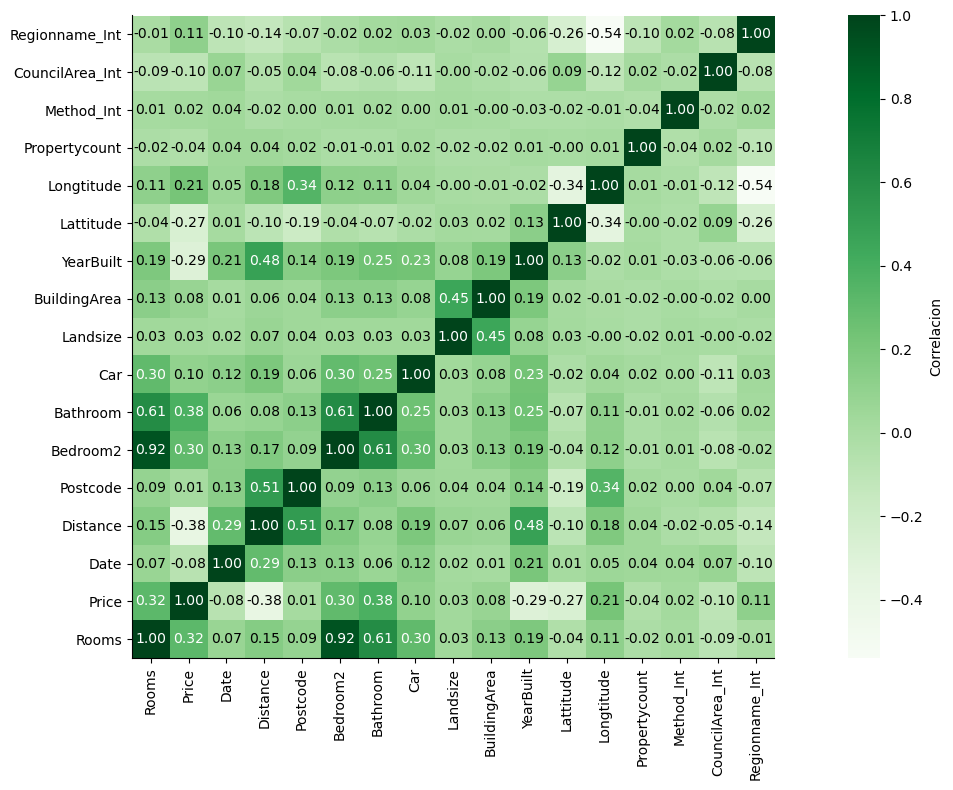

In [21]:
mapa_calor(corr_matrix)

In [22]:
# train(corr_matrix)
# regresion_lineal(dfmelboune)
dfmelburne_sinpricesnulos = dfmelboune.dropna(subset=['Price'])

In [23]:
dfmelboune.isna().sum()

Rooms                  0
Price               5508
Date                   0
Distance               1
Postcode               1
Bedroom2            3558
Bathroom            3564
Car                 4048
Landsize            6286
BuildingArea       13567
YearBuilt          12527
Lattitude           3440
Longtitude          3440
Propertycount          2
Method_Int             0
CouncilArea_Int        0
Regionname_Int         0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
def simpleimputer(cadena,df):
    imp_mean = SimpleImputer()
    df2 = df.copy()

    imp_mean.fit(df2[[cadena]])

    df2[cadena] = imp_mean.transform(df2[[cadena]])

    return df2[cadena]
df2=dfmelboune.copy()
df2['Bathroom']=simpleimputer('Bathroom',dfmelboune).copy()
df2['Bathroom']=simpleimputer('Bathroom',dfmelboune).copy()
df2['Bedroom2']=simpleimputer('Bedroom2',dfmelboune).copy()
df2['Bathroom']=simpleimputer('Bathroom',dfmelboune).copy()
df2['Car']=simpleimputer('Car',dfmelboune).copy()
df2['Landsize']=simpleimputer('Landsize',dfmelboune).copy()
df2['BuildingArea']=simpleimputer('BuildingArea',dfmelboune).copy()
df2['YearBuilt']=simpleimputer('YearBuilt',dfmelboune).copy()
df2['Lattitude']=simpleimputer('Lattitude',dfmelboune).copy()
df2['Longtitude']=simpleimputer('Longtitude',dfmelboune).copy()
df2['Propertycount']=simpleimputer('Propertycount',dfmelboune).copy()
df2['Distance']=simpleimputer('Distance',dfmelboune).copy()
df2['Postcode']=simpleimputer('Postcode',dfmelboune).copy()

df2.isna().sum()

Rooms                 0
Price              5508
Date                  0
Distance              0
Postcode              0
Bedroom2              0
Bathroom              0
Car                   0
Landsize              0
BuildingArea          0
YearBuilt             0
Lattitude             0
Longtitude            0
Propertycount         0
Method_Int            0
CouncilArea_Int       0
Regionname_Int        0
dtype: int64

# ENTRENAMIENTO

Se realiza un análisis de 

    - regresion_lineal(df3)
    - arbol_de_regresion_test(df3)
    - arbol_decision(df3)
    - random_forest(df3)
    - regresion_svr(df3)
Utilizando la biblioteca `scikit-learn` para ajustar un modelo de regresión lineal, un arbol de regresion,random forest,XGboost y SGV a los datos del DataFrame `df3`.

In [25]:
df3=df2.dropna()
df3.isna().sum()
train(df3)


(29554,7390)


(       Rooms  Distance  Bathroom  Bedroom2    YearBuilt  Lattitude  \
 16522      3      19.9       2.0       3.0  1980.000000  -37.78649   
 21721      4      10.5       1.0       4.0  1925.000000  -37.93091   
 24949      4      14.8       3.0       4.0  1957.841439  -37.76264   
 7783       3       3.8       1.0       3.0  1890.000000  -37.83850   
 8627       1      11.2       1.0       1.0  2014.000000  -37.71860   
 ...      ...       ...       ...       ...          ...        ...   
 31918      4      20.0       1.0       4.0  1970.000000  -37.97644   
 23155      4       7.3       2.0       4.0  1925.000000  -37.85645   
 32400      3      12.0       1.0       3.0  1957.841439  -37.70891   
 16849      3      23.0       1.0       3.0  1957.841439  -37.81263   
 33193      5      17.9       2.0       5.0  1957.841439  -37.96234   
 
        Longtitude  CouncilArea_Int  Regionname_Int  Car  BuildingArea  
 16522   145.24836             18.0             1.0  2.0    178.201163  


In [26]:
regresion_lineal(df3)
arbol_de_regresion_test(df3)
arbol_decision(df3)
random_forest(df3)
regresion_svr(df3)

------------Regresion Lineal-------------
(29554,7390)
mae: 332927.49382430664   rmse: 509844.6977975496 r2_score: 0.45568197173357494
----------Arbol de regresión-----------
(29554,7390)
mae: 23546.60896120442   rmse: 112507.42968026568 r2_score: 0.9734942980304307
---------------Arbol de decision---------------
(29554,7390)
Scores:  [511245.50720451 430304.19740522 508750.42204203 528591.73851253
 472257.33244872 441348.73550307 456549.78123603 519024.56331913
 438321.54514975 454885.74909064]
Media:  476127.95719116257
Desviación Std 35324.62148123848
mae: 269937.00336822146   rmse: 462802.81436852296 r2_score: 0.5301402272518456
---------------Random forest---------------
(29554,7390)
Scores:  [295008.35817555 498565.03912245 370617.02439013 367288.97792382
 349184.01773039 336041.20611125 338182.88178902 410158.2644821
 354340.16947021 375085.89132594]
Media:  369447.1830520864
Desviación Std 51613.95792089028
mae: 207428.45266274808   rmse: 349947.2024800637 r2_score: 0.731353409

In [27]:
xgboost(df3)

---------------Xboost---------------
(29554,7390)
XGB cross
Scores:  [394889.01987696 300538.4722076  392609.98149774 349687.29046565
 370199.18289074 352790.45440768 364383.93584304 355084.13128598
 359360.78987677 323565.48881635]
Media:  356310.8747168504
Desviación Std 27044.132720065874
mae: 205972.5154939107   rmse: 343030.487356563 r2_score: 0.7418680736553485


Eliminamos outliers en el Dataframe `df3`

In [28]:
for datos in df3.columns:
    if datos!='Price':
        q_low = df3[datos].quantile(0.0001)
        q_hi  = df3[datos].quantile(0.9999)
        df_filtrado = df3[(df3[datos] < q_hi) & (df3[datos] > q_low)]
xgboost(df_filtrado)

---------------Xboost---------------
(29400,7352)
XGB cross
Scores:  [366974.05807904 335896.05771849 342368.71869129 349551.2949085
 328129.29553169 414213.67090621 313881.95987189 323613.79307296
 355043.94116551 422528.02943362]
Media:  355220.0819379205
Desviación Std 34872.92567555151
mae: 207060.04670497825   rmse: 340918.44801306736 r2_score: 0.7469630370517376
